# Mnist Dataset with PCA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Dataset and Parameters

In [2]:
data = datasets.fetch_openml('mnist_784')
X = data.data
y = data.target
X.shape, y.shape

((70000, 784), (70000,))

In [3]:
random_state = 123

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63000, 784), (7000, 784), (63000,), (7000,))

### PCA Requirements

In [5]:
# Convert data into unit scale 
scaler = StandardScaler()
X_tr  = scaler.fit_transform(X_train, y_train)
X_tr.shape

(63000, 784)

In [6]:
X_tr[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Dimensionality Reduction with PCA

In [8]:
# pca will retain % 95 variance of the original dataset in principal components.
pca = PCA(n_components=0.95, random_state=random_state) 
X_new = pca.fit_transform(X_tr)

# pca will retain % 70 variance of the original dataset in principal components.
pca_70 = PCA(n_components=0.70, random_state=random_state) 
X_new_70 = pca_70.fit_transform(X_tr)

# pca will retain % 100 variance of the original dataset in principal components.
pca_100 = PCA(random_state=random_state) 
X_new_100 = pca_100.fit_transform(X_tr)

In [9]:
pca.n_components_

331

In [10]:
sum(pca.explained_variance_ratio_)

0.9501450563527217

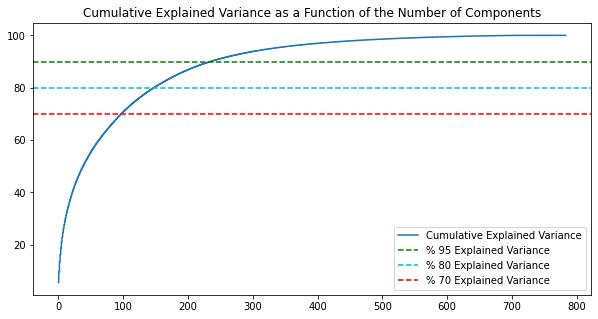

In [13]:
plt.figure(figsize=(10, 5))
plt.step(range(pca_100.n_components_), np.cumsum(pca_100.explained_variance_ratio_ *
         100), where='mid', label='Cumulative Explained Variance')
plt.axhline(y=90, color='g', linestyle='--', label='% 95 Explained Variance')
plt.axhline(y=80, color='c', linestyle='--', label='% 80 Explained Variance')
plt.axhline(y=70, color='r', linestyle='--', label='% 70 Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.legend(loc='best')
plt.show()

Data shapes before and after transformation with PCA:  (63000, 784) (63000, 331)
Avg features shape:  (331, 784) (331, 28, 28)


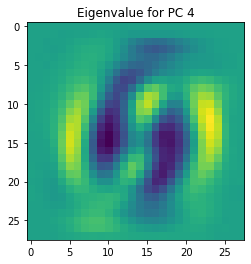

In [24]:
print('Data shapes before and after transformation with PCA: ', X_train.shape, X_new.shape)
print('Avg features shape: ', pca.components_.shape, pca.components_.reshape((pca.n_components_, 28, 28)).shape)
features_average = pca.components_.reshape((pca.n_components_, 28, 28))
plt.imshow(features_average[4])
plt.title('Eigenvalue for PC 4')
plt.show()

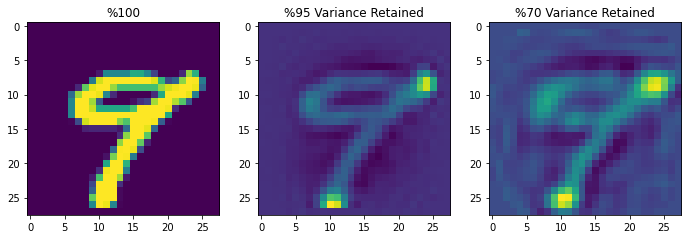

In [26]:
image_no = 100
image_x_train = X_train.values[image_no].reshape(1, -1).reshape(28, 28)
image_x_new = pca.inverse_transform(X_new[image_no]).reshape(28, 28)
image_x_new_70 = pca_70.inverse_transform(X_new_70[image_no]).reshape(28, 28)

plt.figure(figsize=(20, 4))
# Original Image (784 components)
ax = plt.subplot(1, 5, 1)
plt.imshow(image_x_train)
plt.title('%100')
# Transformed image with PCA (%95 of variance retained)
ax = plt.subplot(1, 5, 2)
plt.imshow(image_x_new)
plt.title('%95 Variance Retained')
# Transformed image with PCA (%70 of variance retained)
ax = plt.subplot(1, 5, 3)
plt.imshow(image_x_new_70)
plt.title('%70 Variance Retained')
plt.show()

### Building Clasifier for Mnist Dataset with Transformed Data

In [27]:
clf = LogisticRegression(solver='saga')
clf.fit(X_new, y_train)

/Users/me/Commons/pyenv/versions/3.9.4/envs/default-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [28]:
clf.score(X_new, y_train)
y_pred = clf.predict(X_new)

In [29]:
sample = X_new[0].reshape(1, -1)
print(X_new[0].shape, sample.shape)
clf.predict(sample), y_train[0]

(331,) (1, 331)


(array(['6'], dtype=object), '5')

In [30]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6214
           1       0.93      0.97      0.95      7044
           2       0.93      0.90      0.92      6311
           3       0.92      0.90      0.91      6432
           4       0.92      0.94      0.93      6161
           5       0.90      0.88      0.89      5652
           6       0.94      0.96      0.95      6197
           7       0.93      0.94      0.93      6573
           8       0.90      0.87      0.89      6133
           9       0.90      0.90      0.90      6283

    accuracy                           0.92     63000
   macro avg       0.92      0.92      0.92     63000
weighted avg       0.92      0.92      0.92     63000

